# This Data Science Case Study can make your Hotel more profitable
This Notebook analyses a dataset about hotel booking data from kaggle.
https://www.kaggle.com/jessemostipak/hotel-booking-demand

I've implemented this project in the scope of the Udacity Data Science Nanodegree.
The objective of the project is to shed give insights to the following Business related questions:

## 1. Business Understanding

### Question 1:
How well can we predict if a customer is going to cancel his booking?


### Question 2:
What are the most important factors for a customer to predict if the customer will cancel?

### Question 3:
Which is the preferred distribution channel of repeated customers?

## 2. Data Understanding
In the first step I will get familiar with the data. Based on this step I can decide how to prepare the data and
which model could be suitable to answer the business questions.

In [2]:
# Imports

import pickle
import pprint
import matplotlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# custom imports
from plotting_func import accuracy_confusion_heatmap, plt_feat_importance
from random_parameters import random_grid

# instantiating classes and setting plotting parameters
matplotlib.rcParams['figure.figsize'] = (10, 4)
pp = pprint.PrettyPrinter()
labelencoder = LabelEncoder()

# prediction target column
target = 'is_canceled'

In [3]:
# read data
df = pd.read_csv('./data/hotel_bookings.csv')
df_original = df.copy()  # keep original df so I don't need to reload df

# get first overview of the dataframe, shape, dtypes, missing values etc.
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
print(df.shape)
print(df.dtypes)
df.describe()

(119390, 32)
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
na_cols = list(df.columns[df.isna().mean() > 0])


# prints relative frequency of missing values for each column
for col in na_cols:
    na_sum = df[col].isna().sum()
    na_freq = na_sum / df.shape[0]
    print('The column {} has {} missing values. This are {} percent'.format(col, na_sum, na_freq ))
    

The column children has 4 missing values. This are 3.350364352123293e-05 percent
The column country has 488 missing values. This are 0.004087444509590418 percent
The column agent has 16340 missing values. This are 0.13686238378423654 percent
The column company has 112593 missing values. This are 0.943068933746545 percent


In [6]:
# check how many unique categorial values are in each non-numerical column
cat_cols = df.dtypes[df.dtypes == 'object']
cat_cols.index[0]
for col in cat_cols.index:
    print('The column {} has {} unique values'.format(col, df[col].nunique()))

The column hotel has 2 unique values
The column arrival_date_month has 12 unique values
The column meal has 5 unique values
The column country has 177 unique values
The column market_segment has 8 unique values
The column distribution_channel has 5 unique values
The column reserved_room_type has 10 unique values
The column assigned_room_type has 12 unique values
The column deposit_type has 3 unique values
The column customer_type has 4 unique values
The column reservation_status has 3 unique values
The column reservation_status_date has 926 unique values


## 3. Data Preparation
No that I have a a first understanding of the data, I will deal with missing values and categorial variables.
I will drop columns with a very high percentage of missing values or with no relevant information for my question.

The categorial variables will be encoded. I decided not to use one hot encoding, because I have limited computation capacity on my private machine.
Furthermore I will use the Random Forest Classifier to answer most of my questions. Random Forest are robust to unscaled data.

In [7]:
# drop 'company' column because it has over 93% missing values
# drop id column of travel agent, because not too useful for this analyse
df.drop(columns=['company', 'agent'], inplace=True)

# impute missing information about number of children with mode
df['children'].fillna(int(df.children.mode()), inplace=True)

# aggregate missing values of country to 'no_country'
df['country'].fillna('no_country', inplace=True)

# remove variables that have can bias dataset, or have no information
df.drop(columns=['reservation_status_date'], inplace=True)
df.drop(columns=['reservation_status'], inplace=True)

if(target == 'is_repeated_guest'):
    df.drop(columns=['previous_bookings_not_canceled'], inplace=True)
    df.drop(columns=['previous_cancellations'], inplace=True)

In [8]:
# convert arrival months into integers
keys_list = list(df['arrival_date_month'].unique())
value_list = [6, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5]
d = {k: v for k, v in zip(keys_list, value_list)}
df['arrival_date_month'] = df['arrival_date_month'].map(d)


# encoding country as label

for col in cat_cols.index:
    print('Encoding {}'.format(col))
    try:
        df[col] = labelencoder.fit_transform(df[col])
    except:
        continue

# check if transforming categorial columns worked

still_categorial= df.columns[df.dtypes=='object']
print('The following columns are still categorial: {}'.format(still_categorial))

Encoding hotel
Encoding arrival_date_month
Encoding meal
Encoding country
Encoding market_segment
Encoding distribution_channel
Encoding reserved_room_type
Encoding assigned_room_type
Encoding deposit_type
Encoding customer_type
Encoding reservation_status
Encoding reservation_status_date
The following columns are still categorial: Index([], dtype='object')


Before I start with the Data Modelling step, I run a quick check if all missing valuues are removed

In [9]:
# check if all nas are removed from na_cols
for col in na_cols:
    if not col in df.columns:
        continue
    na_sum = df[col].isna().sum()
    print('The column {} has {} missing values'.format(col, na_sum))

The column children has 0 missing values
The column country has 0 missing values


## 4. Data Modelling
The Modelling step wil fit the models to answer the questions 1-3 as defined at the beginning. 
For the question, if we can predict if a guest will cancel his reservation, I will use da decision tree classifier as baseline.
For the actual prediction I used a random forest classifier with and without hyperparameter tuning

In [10]:
# to Q1: decision tree and random forest to classify canceled or not =========

# =============================================================================
# DATA MODELLING Decision Tree
# =============================================================================
# separating data into dependent and independent variable
X = df.drop(columns=[target])
y = df[target]

# splitting data into training and testing data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

# Decision Tree as baseline ==================================================
# 1. instantiating fitting DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train, y_train)

# 2. predicting and evaluating model
y_pred_dt = clf_dt.predict(X_test)

The Evaluation of all model will follow for all models together, after the data modelling step

In [11]:
# =============================================================================
# DATA MODELLING RandomForestClassifier
# =============================================================================

# RandomForestClassifier for more sophisticated predictions ==================
# 1. instantiating and fitting model
rf_not_tuned = RandomForestClassifier(random_state=42)
rf_not_tuned.fit(X_train, y_train)

# 2. predicting if guest will cancel his reservation
y_pred_non_tuned = rf_not_tuned.predict(X_test)

I use a randomize search grid and 3-fold cross validation for parameter tuning.
The grid for the tuning is specified in a separate python file random_parameters.py

In [14]:
#Tune RandomForestClassifier with Random Grid Search
rf_for_tuning = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf_for_tuning,
                               param_distributions=random_grid,
                               n_iter=50, cv=3,
                               verbose=2,
                               random_state=42,
                               n_jobs=4)
# Fit the random search model
rf_random.fit(X_train, y_train)
best_random = rf_random.best_estimator_  # get best model
# safe model
pickle.dump(rf_random, open('rf_random.pkl', 'wb'))
#rf_random = pickle.load(open('./rf_random.pkl', 'rb'))

# predict cancellation with best random forest
y_pred_tuned = best_random.predict(X_test)

In [15]:
print(rf_random.best_params_)


{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': False}

## 5.Data Evaluation
In order to evaluate the performance of the models, I use the accuracy, defined as the number of correct predictions divded by the number of total predictions.
Furthermore I present ohter evaluation metric such as precision, recall and the f1 score per class.
Finally I show a confusion heatmap to visualize the performance of the models.
Regarding the structur: Each model will be evaluated in its own cell so we have:\
* Decision Tree
* Random Forest without tuning
* Random Forest with tuning

### Decision Tree Evaluation

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.88      0.88      0.88     22550\n'
 '           1       0.80      0.80      0.80     13267\n'
 '\n'
 '    accuracy                           0.85     35817\n'
 '   macro avg       0.84      0.84      0.84     35817\n'
 'weighted avg       0.85      0.85      0.85     35817\n')


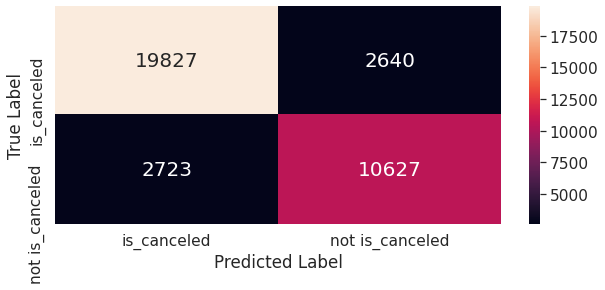

In [17]:
# =============================================================================
# DATA EVALUATION
# =============================================================================
# evaluation decision tree
pp.pprint(metrics.classification_report(y_true=y_test, y_pred=y_pred_dt))
accuracy_confusion_heatmap(y_pred_dt, y_test, target)

### Random Forest Untuned Evaluation

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.89      0.94      0.92     22550\n'
 '           1       0.89      0.81      0.85     13267\n'
 '\n'
 '    accuracy                           0.89     35817\n'
 '   macro avg       0.89      0.88      0.88     35817\n'
 'weighted avg       0.89      0.89      0.89     35817\n')


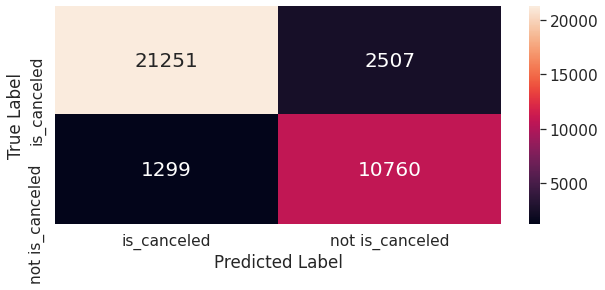

In [18]:
# non tuned Random Forest evaluation
pp.pprint(metrics.classification_report(
    y_true=y_test, y_pred=y_pred_non_tuned))
accuracy_confusion_heatmap(y_pred_non_tuned, y_test, target)

### Random Forest Tuned Evaluation

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.90      0.94      0.92     22550\n'
 '           1       0.89      0.82      0.85     13267\n'
 '\n'
 '    accuracy                           0.90     35817\n'
 '   macro avg       0.89      0.88      0.89     35817\n'
 'weighted avg       0.90      0.90      0.89     35817\n')


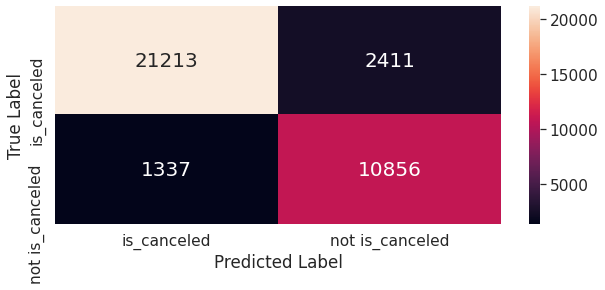

In [19]:
# Tuned Random Forest evaluation
pp.pprint(metrics.classification_report(y_true=y_test, y_pred=y_pred_tuned))
accuracy_confusion_heatmap(y_pred_tuned, y_test, target)

### Evaluation Takeaway Question 1
All three methods yield highly accurate predictions. The effect of tuning is neglectable.\
In conclusion, it is possible to predict if a customer will cancel based on information we have about the customer.\
Next up I will look at the variable importance and their correlation with cancellation.


### Evaluation Question 3
The following grafic shows the most important factors to predict if a customer will cancle his stay.
The correlation with the cancellation is shown on the right.

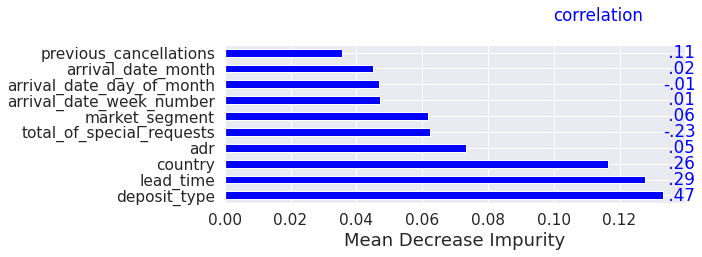

hotel                             0.010747
lead_time                         0.127619
arrival_date_year                 0.026362
arrival_date_month                0.045057
arrival_date_week_number          0.047244
arrival_date_day_of_month         0.047028
stays_in_weekend_nights           0.018986
stays_in_week_nights              0.030303
adults                            0.011840
children                          0.005591
babies                            0.000700
meal                              0.012221
country                           0.116441
market_segment                    0.061810
distribution_channel              0.012418
is_repeated_guest                 0.002143
previous_cancellations            0.035763
previous_bookings_not_canceled    0.004388
reserved_room_type                0.014451
assigned_room_type                0.025249
booking_changes                   0.022073
deposit_type                      0.133192
days_in_waiting_list              0.002006
customer_ty

In [25]:
# Question 2 ### ===========================================================
# to Q2: random forest for variable importance

important_features = pd.Series(
    best_random.feature_importances_, index=X.columns)
relevant_features = list(important_features.nlargest(10).index)
relevant_features.append(target)
correlation = df[relevant_features].corr()[target]
plt_feat_importance(best_random, X.columns, 10, correlation)

### Evaluation Question 3

In [13]:
# =============================================================================
# DATA MODELLING adn Evaluation Question 3
# =============================================================================
df_original.groupby('distribution_channel').mean()['is_repeated_guest']
repeated_guest_channel_mean = df_original.groupby('distribution_channel')\
    .mean()['is_repeated_guest']
repeated_guest_channel_sum = df_original.groupby('distribution_channel')\
                                        .sum()['is_repeated_guest']
distribution_channel_df = pd.concat([repeated_guest_channel_mean,
                                     repeated_guest_channel_sum],
                                    axis=1)
distribution_channel_df.rename(columns={'is_repeated_guest':
                                        'Frequency_Repeated_Guest',
                                        'is_repeated_guest':
                                        'Sum_Repeated_Guest'},
                               inplace=True)

print(distribution_channel_df)

                      Sum_Repeated_Guest  Sum_Repeated_Guest
distribution_channel                                        
Corporate                       0.235435                1572
Direct                          0.063981                 937
GDS                             0.015544                   3
TA/TO                           0.013262                1298
Undefined                       0.000000                   0
